In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
import tensorflow as tf
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#00b3e5;"> Milestone 1

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Step 1: Import the data \
    Step 2: Map training and testing images to its classes

In [2]:
# Hyperparameters for loading the training, testing data and mapping it with annotations
validation_split = 0.2
batch_size = 32
shuffle = False # This is set to false to mainitain the same order in the training data and the annotations data - explained later
image_width  = 256
image_height = 256
image_size   = (image_width, image_height)
mask_width   = 28
mask_height  = 28

In [3]:
training_data = tf.keras.utils.image_dataset_from_directory(
  directory='./Car Images/Train Images',
  label_mode='categorical',
  validation_split=validation_split,
  subset="training",
  shuffle=shuffle,
  seed=123,
  batch_size=batch_size,
  image_size = image_size)

validation_data = tf.keras.utils.image_dataset_from_directory(
  directory='./Car Images/Train Images',
  label_mode='categorical',
  validation_split=validation_split,
  subset="validation",
  shuffle=False,
  seed=123,
  batch_size=batch_size,
  image_size = image_size)

Found 8144 files belonging to 196 classes.
Using 6516 files for training.
Found 8144 files belonging to 196 classes.
Using 1628 files for validation.


In [4]:
print(type(training_data))
print(type(validation_data))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [5]:
print('Total number of batches (of size 32) in the training data:', len(training_data))
print('Shape and type of each batch in the training data:', training_data)

Total number of batches (of size 32) in the training data: 204
Shape and type of each batch in the training data: <BatchDataset shapes: ((None, 256, 256, 3), (None, 196)), types: (tf.float32, tf.float32)>


In [6]:
print('Number of classes in training dataset:',np.size(training_data.class_names))
training_data.class_names

Number of classes in training dataset: 196


['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [7]:
print('Total number of batches (of size 32) in the validation data:', len(validation_data))
print('Shape and type of each batch in the validation data:', validation_data)

Total number of batches (of size 32) in the validation data: 51
Shape and type of each batch in the validation data: <BatchDataset shapes: ((None, 256, 256, 3), (None, 196)), types: (tf.float32, tf.float32)>


In [8]:
print('Number of classes in training dataset:',np.size(validation_data.class_names))
validation_data.class_names

Number of classes in training dataset: 196


['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [9]:
class_labels = training_data.class_names

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Step 3: Map training and testing images to its annotations

In [10]:
training_annotations = pd.read_csv('./Annotations/Train Annotations.csv')

In [11]:
training_annotations.head()

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   
3  00004.jpg                       621         393        1484        1096   
4  00005.jpg                        14          36         133          99   

   Image class  
0           14  
1            3  
2           91  
3          134  
4          106

In [12]:
training_annotations.rename(columns = {'Bounding Box coordinates':'x0', 'Unnamed: 2':'y0','Unnamed: 3':'x1','Unnamed: 4':'y1'}, inplace = True)

In [13]:
training_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image Name   8144 non-null   object
 1   x0           8144 non-null   int64 
 2   y0           8144 non-null   int64 
 3   x1           8144 non-null   int64 
 4   y1           8144 non-null   int64 
 5   Image class  8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [14]:
# Get the file names corresponding to the training data in that particular order
file_names_list = []
file_path_list = []

for file_path in training_data.file_paths:
    file_path_list.append(file_path)
    file_names_list.append(file_path[-9:])

- Please note that it is important to check if the same sampling order is mainitained in the file_names_list and the training data because we use the file_names_list for setting the indices of y_train. 
- It is observed that if 'shuffle' is set to True while reading the data, the same order is not mainitained.
- Also, please note that the class names in the annotations data start from 1 while tensflow assigns the class names from 0 in the training data.

In [15]:
# Display the file names for the first 32 images (corresponds to the first batch) to check the order in the file_names_list and the training data
file_names_list[:31]

['00163.jpg',
 '00462.jpg',
 '00522.jpg',
 '00707.jpg',
 '00773.jpg',
 '00887.jpg',
 '00946.jpg',
 '01277.jpg',
 '01661.jpg',
 '01832.jpg',
 '01918.jpg',
 '01952.jpg',
 '02050.jpg',
 '02145.jpg',
 '02311.jpg',
 '02363.jpg',
 '02848.jpg',
 '03008.jpg',
 '03393.jpg',
 '03943.jpg',
 '04056.jpg',
 '04544.jpg',
 '04578.jpg',
 '04669.jpg',
 '04827.jpg',
 '04874.jpg',
 '05030.jpg',
 '05224.jpg',
 '05657.jpg',
 '05754.jpg',
 '05804.jpg']

In [16]:
# Print the class names for the first 32 images in the annotations data
for i in range(31):
    print(class_labels[training_annotations['Image class'][training_annotations['Image Name']==file_names_list[i]].values[0]-1])

AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000


In [17]:
# Print the class names for the images in the first batch in the training data
for element,label in training_data:
    for i in range(len(label)):
        #print(len(element))
        #print(np.nonzero(label)[0][0])
        print(class_labels[np.nonzero(label)[0][0]])
    break

AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000
AM General Hummer SUV 2000


In [18]:
i = 0
y_train = np.zeros((len(file_names_list), 4))

for file_name in file_names_list:
    mask_data = training_annotations[training_annotations['Image Name']==file_name]
    img_original = imread(file_path_list[i])
    image_height_original = img_original.shape[0]
    image_width_original  = img_original.shape[1]
    y_train[i,0] = mask_data['x0'].values[0]*image_width/image_width_original
    y_train[i,1] = mask_data['y0'].values[0]*image_height/image_height_original
    y_train[i,2] = mask_data['x1'].values[0]*image_width/image_width_original
    y_train[i,3] = mask_data['y1'].values[0]*image_height/image_height_original
    i+=1

In [19]:
print(mask_data['x0'].values[0])
print(mask_data['y0'].values[0])
print(mask_data['x1'].values[0])
print(mask_data['y1'].values[0])

49
31
150
141


In [20]:
img_original.shape

(150, 150, 3)

In [21]:
np.shape(y_train)

(6516, 4)

In [22]:
y_train[0]

array([ 16.82285714,  40.96      , 241.73714286, 208.70095238])

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Step 4: Display images with bounding box

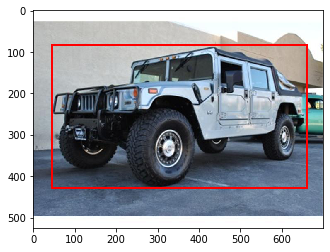

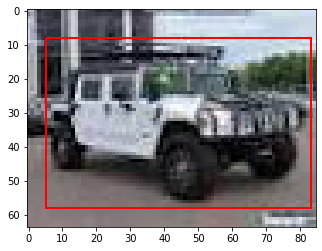

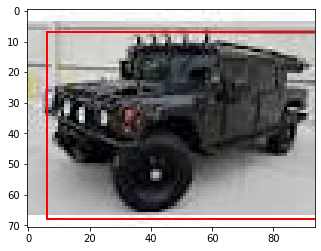

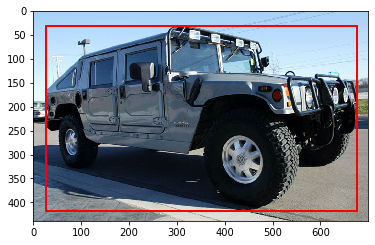

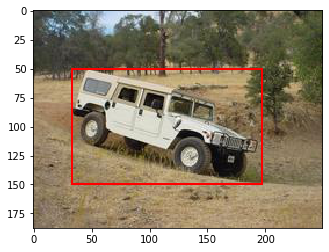

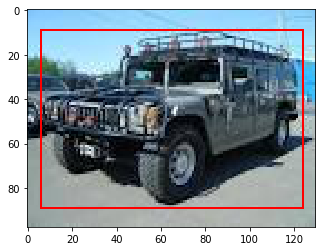

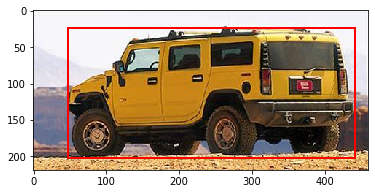

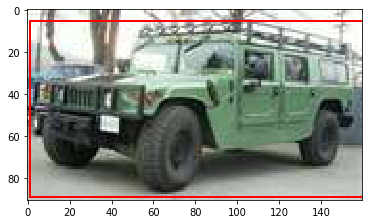

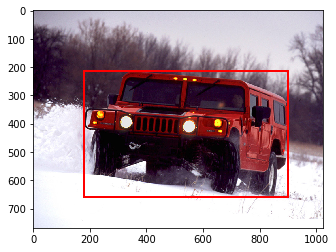

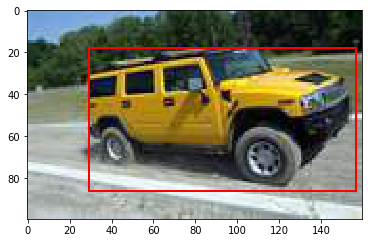

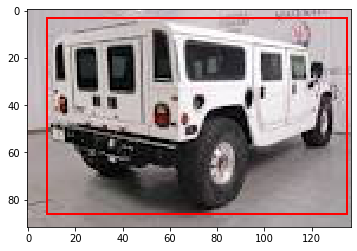

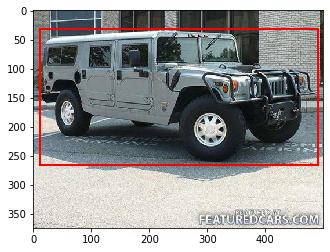

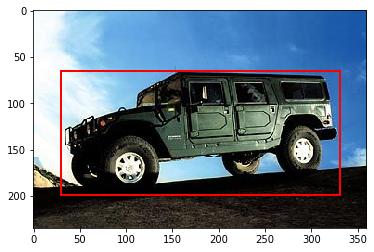

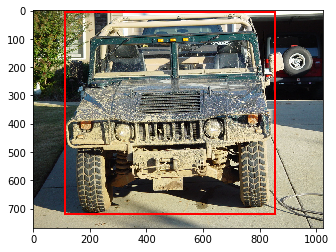

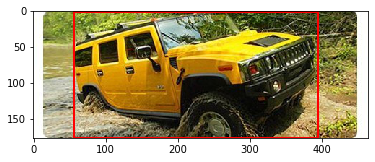

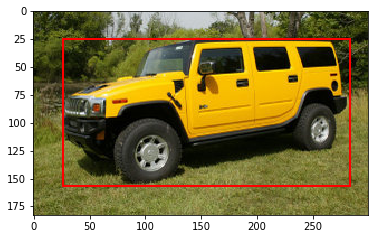

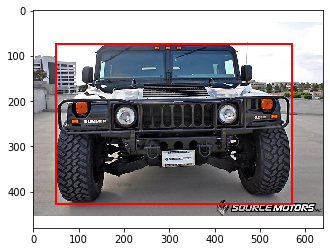

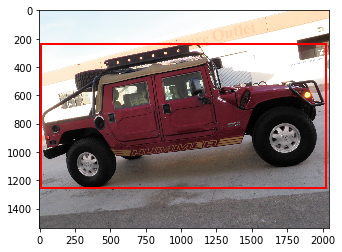

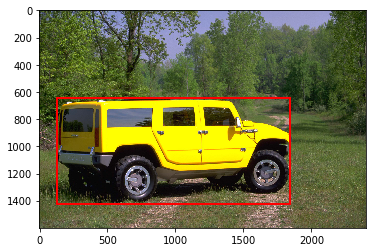

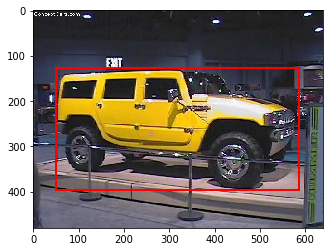

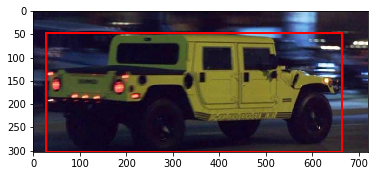

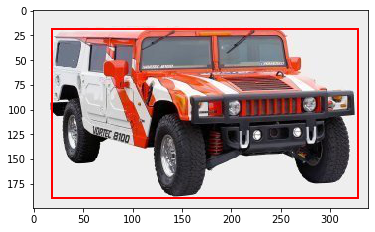

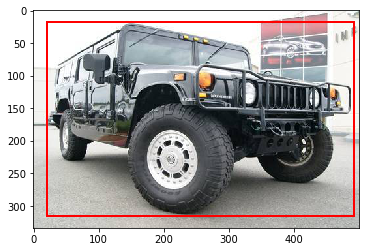

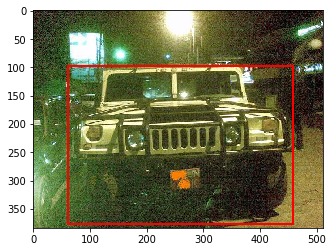

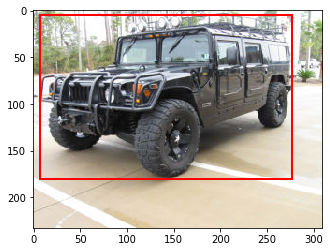

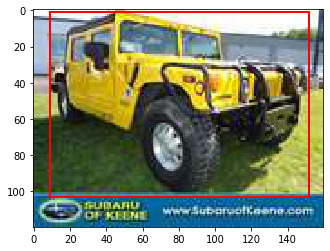

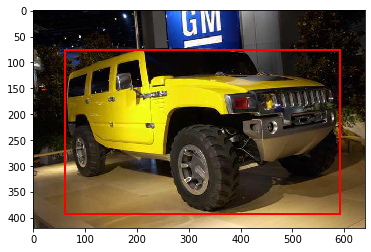

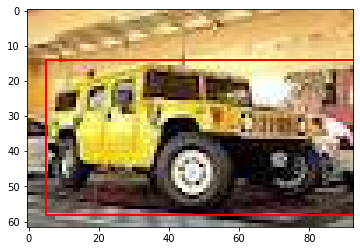

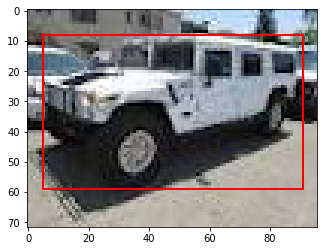

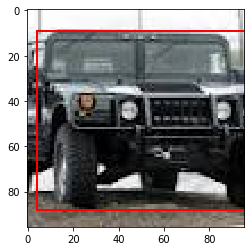

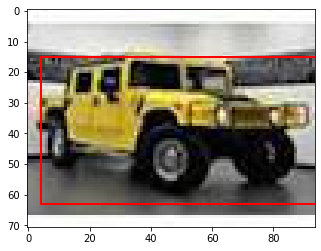

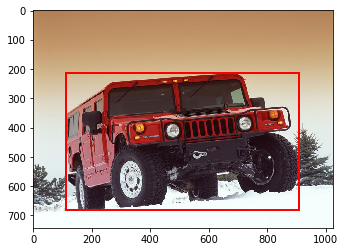

In [23]:
# Plot 32 images from the first batch - original images and original bounding box sizes
i = 0
for file_name in file_names_list:
    if i<32:
        img_original = imread(file_path_list[i])
        fig,ax = plt.subplots(1)
        ax.imshow(img_original)
        mask_data = training_annotations[training_annotations['Image Name']==file_name]
        mask = patches.Rectangle((mask_data['x0'].values[0], mask_data['y0'].values[0]), mask_data['x1'].values[0]-mask_data['x0'].values[0], mask_data['y1'].values[0]-mask_data['y0'].values[0], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(mask)
        plt.show()
        plt.close()
        i+=1
        #print(img_original.shape[0])
        #print(img_original.shape[1])
        #print(mask_data['x0'].values[0])
        #print(mask_data['y0'].values[0])
        #print(mask_data['x1'].values[0])
        #print(mask_data['y1'].values[0])

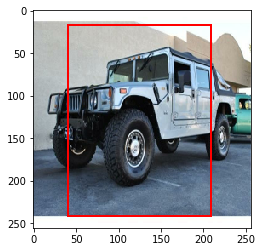

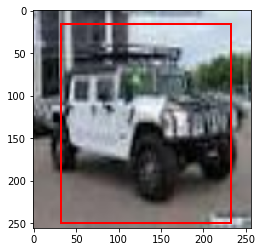

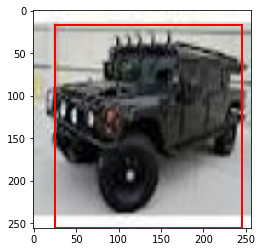

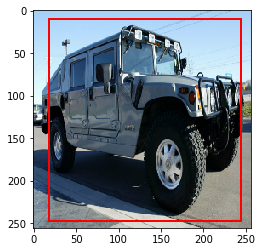

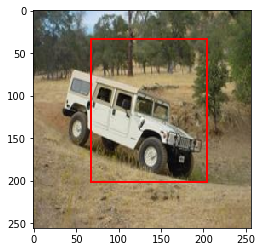

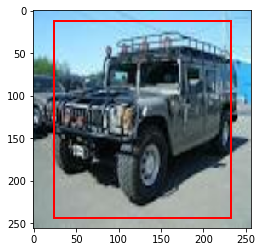

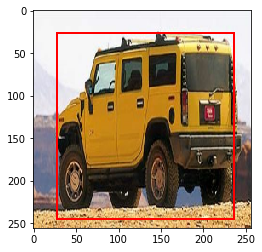

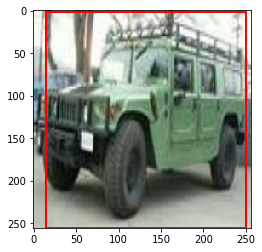

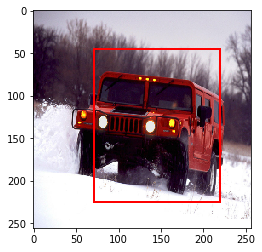

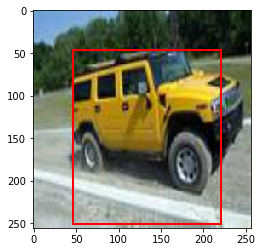

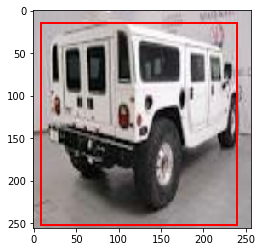

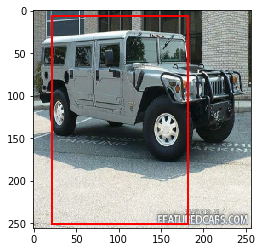

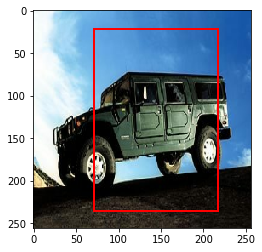

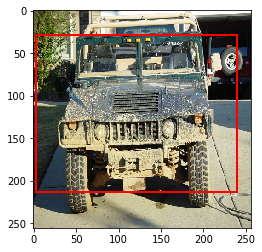

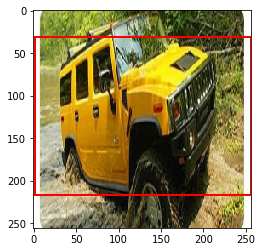

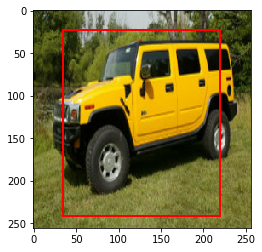

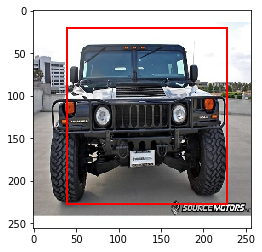

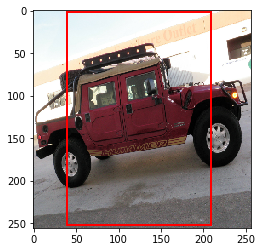

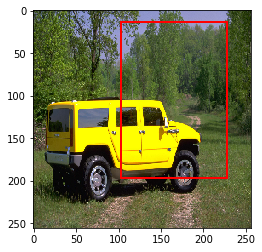

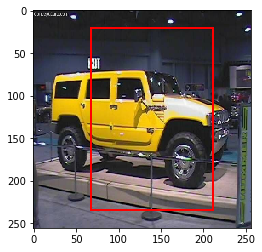

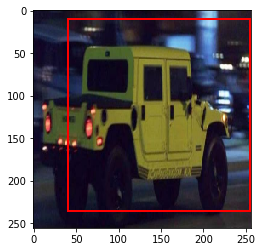

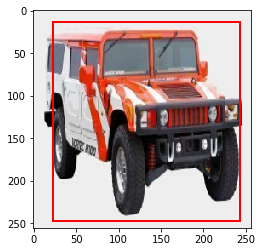

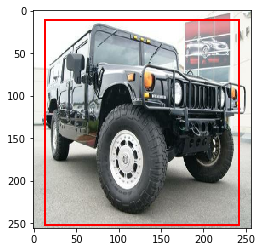

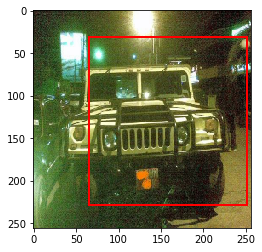

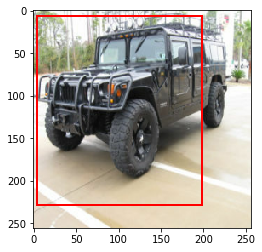

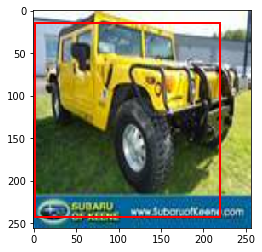

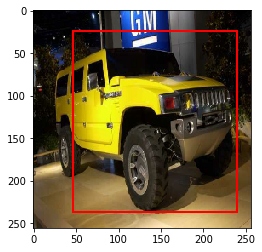

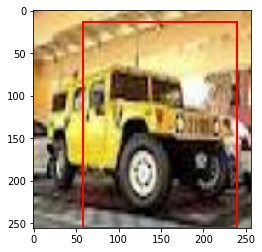

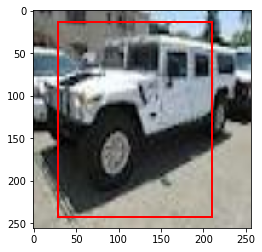

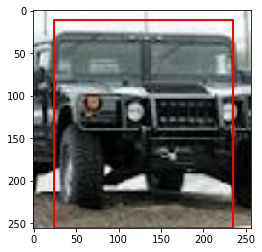

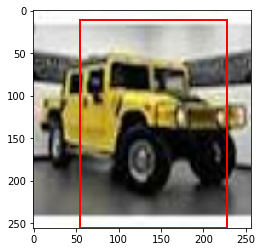

In [24]:
# Plot 32 images from the first batch - resized images and resized bounding box sizes
for images, labels in training_data.take(1):
    for i in range(len(images)-1):
        fig,ax = plt.subplots(1)
        ax.imshow(images[i].numpy().astype("uint8"))
        mask = patches.Rectangle((y_train[i,1], y_train[i,0]), y_train[i,3]-y_train[i,1], y_train[i,2]-y_train[i,0], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(mask)
        plt.show()
        plt.close()